In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import csv
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as sts

# Save path to data set in a variable
csvpath = os.path.join('owid-covid-data.csv')

In [3]:
# Use Pandas to read data
covid = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


<AxesSubplot:>

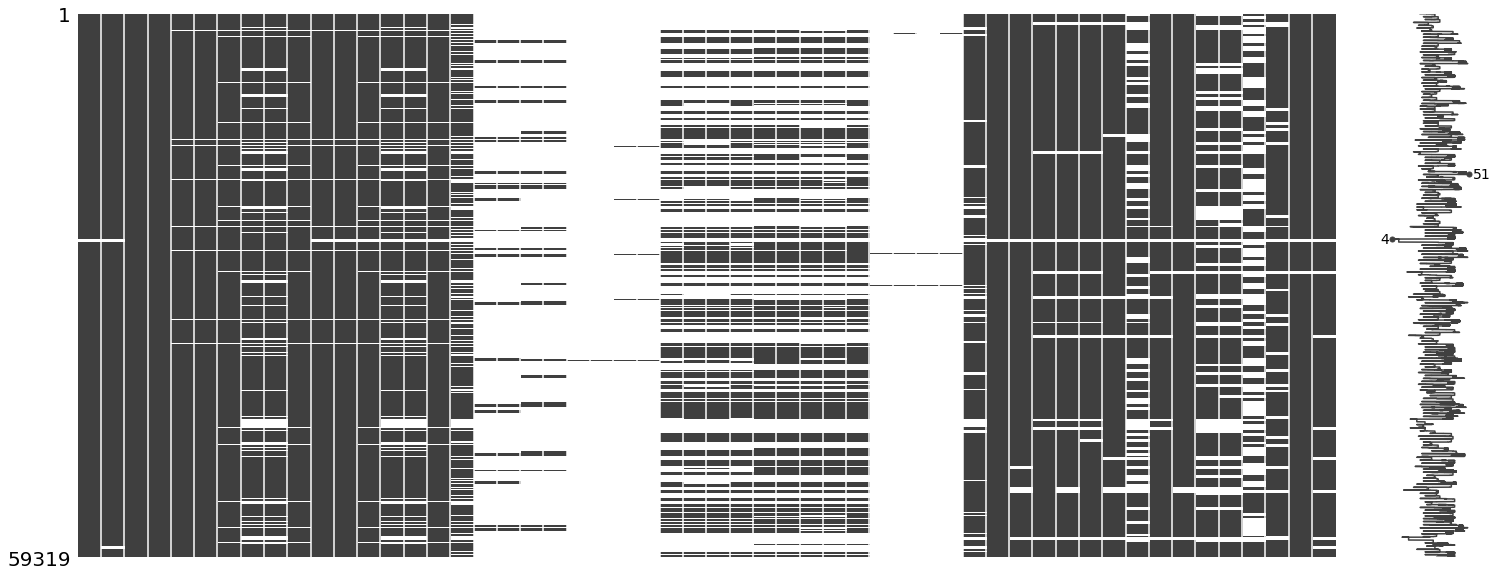

In [4]:
#identify missing value
msno.matrix(covid)

In [5]:
# Display a statistical overview of the DataFrame
covid.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,58980,58624,59319,59319,58772,58765,57810,50365,50364,57810,...,56462,38678,57054,57710,45051,44434,28558,52429,58677,56712
unique,191,6,192,377,28885,6992,14477,9973,1421,3456,...,183,75,184,136,108,124,95,100,178,158
top,ARG,Africa,Argentina,2020-11-30,1.0,0.0,0.0,1.0,0.0,0.0,...,18933.907,0.2,191.032,2.42,1.9,24.7,87.847,0.7,76.88,0.757
freq,376,16248,376,192,874,13613,4132,1784,21956,18144,...,376,4268,376,3901,1375,1235,376,2084,934,961


In [6]:
# Remove duplicate rows
covid.drop_duplicates

<bound method DataFrame.drop_duplicates of       iso_code continent     location        date total_cases new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24         1.0       1.0   
1          AFG      Asia  Afghanistan  2020-02-25         1.0       0.0   
2          AFG      Asia  Afghanistan  2020-02-26         1.0       0.0   
3          AFG      Asia  Afghanistan  2020-02-27         1.0       0.0   
4          AFG      Asia  Afghanistan  2020-02-28         1.0       0.0   
...        ...       ...          ...         ...         ...       ...   
59314      ZWE    Africa     Zimbabwe  2021-01-06     17804.0     610.0   
59315      ZWE    Africa     Zimbabwe  2021-01-07     18675.0     871.0   
59316      ZWE    Africa     Zimbabwe  2021-01-08     19660.0     985.0   
59317      ZWE    Africa     Zimbabwe  2021-01-09     20499.0     839.0   
59318      ZWE    Africa     Zimbabwe  2021-01-10     21477.0     978.0   

      new_cases_smoothed total_deaths new_deaths new_dea

In [7]:
covid.count()

iso_code                              58980
continent                             58624
location                              59319
date                                  59319
total_cases                           58772
new_cases                             58765
new_cases_smoothed                    57810
total_deaths                          50365
new_deaths                            50364
new_deaths_smoothed                   57810
total_cases_per_million               58433
new_cases_per_million                 58426
new_cases_smoothed_per_million        57476
total_deaths_per_million              50039
new_deaths_per_million                50038
new_deaths_smoothed_per_million       57476
reproduction_rate                     44995
icu_patients                           6129
icu_patients_per_million               6129
hosp_patients                          6867
hosp_patients_per_million              6867
weekly_icu_admissions                   560
weekly_icu_admissions_per_millio

In [8]:
# select the columns that we want
organized_df = covid[["continent", "location", "new_deaths", "hospital_beds_per_thousand", "gdp_per_capita"]]

In [9]:
# list out the dataframe to make sure the selected columns exist.
organized_df.head()

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
0,Asia,Afghanistan,NaN,0.5,1803.987
1,Asia,Afghanistan,NaN,0.5,1803.987
2,Asia,Afghanistan,NaN,0.5,1803.987
3,Asia,Afghanistan,NaN,0.5,1803.987
4,Asia,Afghanistan,NaN,0.5,1803.987


In [10]:
# check any missing value
organized_df.count()

continent                     58624
location                      59319
new_deaths                    50364
hospital_beds_per_thousand    52429
gdp_per_capita                56462
dtype: int64

In [11]:
# remove missing value by dropna
organized_df = organized_df.dropna(how='any')

In [12]:
# double check by using .count to make sure the missing value have been removed
organized_df.count()

continent                     42974
location                      42974
new_deaths                    42974
hospital_beds_per_thousand    42974
gdp_per_capita                42974
dtype: int64

In [13]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
27,Asia,Afghanistan,1.0,0.5,1803.987
28,Asia,Afghanistan,0.0,0.5,1803.987
29,Asia,Afghanistan,0.0,0.5,1803.987
30,Asia,Afghanistan,1.0,0.5,1803.987
31,Asia,Afghanistan,1.0,0.5,1803.987
...,...,...,...,...,...
59314,Africa,Zimbabwe,13.0,1.7,1899.775
59315,Africa,Zimbabwe,15.0,1.7,1899.775
59316,Africa,Zimbabwe,22.0,1.7,1899.775
59317,Africa,Zimbabwe,15.0,1.7,1899.775


In [14]:
#check the data type
print(organized_df.dtypes)

continent                     object
location                      object
new_deaths                    object
hospital_beds_per_thousand    object
gdp_per_capita                object
dtype: object


In [15]:
# Use pd.to_numeric() method to convert the datatype
organized_df['new_deaths'] = pd.to_numeric(organized_df['new_deaths'])
organized_df['hospital_beds_per_thousand'] = pd.to_numeric(organized_df['hospital_beds_per_thousand'])
organized_df['gdp_per_capita'] = pd.to_numeric(organized_df['gdp_per_capita'])

In [16]:
#check the data type again
print(organized_df.dtypes)

continent                      object
location                       object
new_deaths                    float64
hospital_beds_per_thousand    float64
gdp_per_capita                float64
dtype: object


# Total deaths VS Hospital beds per thousand

In [17]:
# The unique method shows every element of the series in location that appears only once
unique1 = organized_df["location"].unique()
unique1

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', '

In [18]:
# The unique method shows every element of the series in continent that appears only once
unique2 = organized_df["continent"].unique()
unique2

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [19]:
# The value_counts method counts unique values in a column
count1 = organized_df["continent"].value_counts()
count1

Europe           12365
Asia             10888
Africa           10350
North America     5053
South America     3550
Oceania            768
Name: continent, dtype: int64

In [20]:
# The value_counts method counts unique values in a column
count2 = organized_df["location"].value_counts()
count2

China          354
Philippines    344
Japan          333
France         331
Iran           327
              ... 
Fiji           164
Vietnam        164
Saint Lucia     62
Eritrea         20
Mongolia        13
Name: location, Length: 150, dtype: int64

In [21]:
# Display a statistical overview of the DataFrame
organized_df.describe()

,new_deaths,hospital_beds_per_thousand,gdp_per_capita
count,42974.000000,42974.000000,42974.000000
mean,44.824336,3.013207,21498.421953
std,176.567623,2.394959,20461.425095
min,-1918.000000,0.100000,661.240000
25%,0.000000,1.300000,6253.104000
50%,2.000000,2.400000,15663.986000
75%,14.000000,4.200000,31400.840000
max,4194.000000,13.050000,116935.600000


In [22]:
# Create a new DataFrame that looks into a specific region (eg: Italy)
Italy_df = organized_df.loc[organized_df["location"] == "Italy"]
Italy_df

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
26268,Europe,Italy,1.0,3.18,35220.084
26269,Europe,Italy,1.0,3.18,35220.084
26270,Europe,Italy,1.0,3.18,35220.084
26271,Europe,Italy,4.0,3.18,35220.084
26272,Europe,Italy,3.0,3.18,35220.084
...,...,...,...,...,...
26588,Europe,Italy,548.0,3.18,35220.084
26589,Europe,Italy,414.0,3.18,35220.084
26590,Europe,Italy,620.0,3.18,35220.084
26591,Europe,Italy,483.0,3.18,35220.084


In [23]:
# Using .rename(columns={}) in order to rename columns
organized_df = organized_df.rename(columns={"new_deaths": "Total deaths", "hospital_beds_per_thousand": "Hospital beds per thousand", "gdp_per_capita": "GDP per capita", "continent": "Continent", "location": "Location"})
organized_df

,Continent,Location,Total deaths,Hospital beds per thousand,GDP per capita
27,Asia,Afghanistan,1.0,0.5,1803.987
28,Asia,Afghanistan,0.0,0.5,1803.987
29,Asia,Afghanistan,0.0,0.5,1803.987
30,Asia,Afghanistan,1.0,0.5,1803.987
31,Asia,Afghanistan,1.0,0.5,1803.987
...,...,...,...,...,...
59314,Africa,Zimbabwe,13.0,1.7,1899.775
59315,Africa,Zimbabwe,15.0,1.7,1899.775
59316,Africa,Zimbabwe,22.0,1.7,1899.775
59317,Africa,Zimbabwe,15.0,1.7,1899.775


In [24]:
# group a DataFrame by multiple columns
grouped_international_data = organized_df.groupby(['Continent', 'Location'])
grouped_international_data.count().head(20)

Total deaths  Hospital beds per thousand  \
Continent Location                                                             
Africa    Algeria                            305                         305   
          Benin                              280                         280   
          Botswana                           286                         286   
          Burkina Faso                       299                         299   
          Burundi                            273                         273   
          Cameroon                           292                         292   
          Cape Verde                         293                         293   
          Central African Republic           233                         233   
          Comoros                            250                         250   
          Djibouti                           276                         276   
          Egypt                              309                         309   
          Equatorial Guinea                  264                         264   
          Eritrea                             20                          20   
          Eswatini                           270                         270   
          Ethiopia                           281                         281   
          Gabon                              297                         297   
          Gambia                             294                         294   
          Ghana                              296                         296   
          Guinea                             271                         271   
          Kenya                              291                         291   

                                    GDP per capita  
Continent Location                                  
Africa    Algeria                              305  
          Benin                                280  
          Botswana                             286  
          Burkina Faso                         299  
          Burundi                              273  
          Cameroon                             292  
          Cape Verde                           293  
          Central African Republic             233  
          Comoros                              250  
          Djibouti                             276  
          Egypt                                309  
          Equatorial Guinea                    264  
          Eritrea                               20  
          Eswatini                             270  
          Ethiopia                             281  
          Gabon                                297  
          Gambia                               294  
          Ghana                                296  
          Guinea                               271  
          Kenya                                291

In [25]:
grouped_international_data = organized_df.groupby(['Continent', 'Location']).agg({'Total deaths':'sum','Hospital beds per thousand':'mean', 'GDP per capita':'mean'})
grouped_international_data

Total deaths  Hospital beds per thousand  \
Continent     Location                                                 
Africa        Algeria             2807.0                         1.9   
              Benin                 44.0                         0.5   
              Botswana              48.0                         1.8   
              Burkina Faso          89.0                         0.4   
              Burundi                2.0                         0.8   
...                                  ...                         ...   
South America Paraguay            2405.0                         1.3   
              Peru               38049.0                         1.6   
              Suriname             133.0                         3.1   
              Uruguay              256.0                         2.8   
              Venezuela           1061.0                         0.8   

                            GDP per capita  
Continent     Location                      
Africa        Algeria            13913.839  
              Benin               2064.236  
              Botswana           15807.374  
              Burkina Faso        1703.102  
              Burundi              702.225  
...                                    ...  
South America Paraguay            8827.010  
              Peru               12236.706  
              Suriname           13767.119  
              Uruguay            20551.409  
              Venezuela          16745.022  

[150 rows x 3 columns]

In [26]:
# Rename columns for readability
covid_renamed_df = grouped_international_data.rename(columns={"new_deaths": "Total deaths", "hospital_beds_per_thousand": "Hospital beds per thousand", "gdp_per_capita": "GDP per capita"})
covid_renamed_df

Total deaths  Hospital beds per thousand  \
Continent     Location                                                 
Africa        Algeria             2807.0                         1.9   
              Benin                 44.0                         0.5   
              Botswana              48.0                         1.8   
              Burkina Faso          89.0                         0.4   
              Burundi                2.0                         0.8   
...                                  ...                         ...   
South America Paraguay            2405.0                         1.3   
              Peru               38049.0                         1.6   
              Suriname             133.0                         3.1   
              Uruguay              256.0                         2.8   
              Venezuela           1061.0                         0.8   

                            GDP per capita  
Continent     Location                      
Africa        Algeria            13913.839  
              Benin               2064.236  
              Botswana           15807.374  
              Burkina Faso        1703.102  
              Burundi              702.225  
...                                    ...  
South America Paraguay            8827.010  
              Peru               12236.706  
              Suriname           13767.119  
              Uruguay            20551.409  
              Venezuela          16745.022  

[150 rows x 3 columns]

In [27]:
# Sorting the DataFrame based on "Hospital beds per thousand" column (high to low)
hospital_beds_per_thousand_high = covid_renamed_df.sort_values("Hospital beds per thousand", ascending=False)
hospital_beds_per_thousand_high.head()

Total deaths  Hospital beds per thousand  \
Continent Location                                                
Asia      Japan              3850.0                       13.05   
          South Korea        1140.0                       12.27   
Europe    Belarus            1517.0                       11.00   
          Ukraine           20641.0                        8.80   
          Russia            60963.0                        8.05   

                       GDP per capita  
Continent Location                     
Asia      Japan             39002.223  
          South Korea       35938.374  
Europe    Belarus           17167.967  
          Ukraine            7894.393  
          Russia            24765.954

In [28]:
# Sorting the DataFrame based on "Hospital beds per thousand" column (low to high)
hospital_beds_per_thousand_low = covid_renamed_df.sort_values("Hospital beds per thousand")
hospital_beds_per_thousand_low.head()

Total deaths  Hospital beds per thousand  GDP per capita
Continent Location                                                            
Africa    Mali               298.0                         0.1        2014.306
          Madagascar         267.0                         0.2        1416.440
          Niger              126.0                         0.3         926.000
          Ethiopia          1994.0                         0.3        1729.927
          Guinea              81.0                         0.3        1998.926

In [29]:
# Sorting the DataFrame based on "Total deaths" column (high to low)
total_deaths_high = covid_renamed_df.sort_values("Total deaths", ascending=False)
total_deaths_high.head(10)

Total deaths  Hospital beds per thousand  \
Continent     Location                                                   
North America United States       374322.0                        2.77   
South America Brazil              203100.0                        2.20   
Asia          India               151160.0                        0.53   
North America Mexico              133706.0                        1.38   
Europe        United Kingdom       81567.0                        2.54   
              Italy                78755.0                        3.18   
              France               67885.0                        5.98   
              Russia               60963.0                        8.05   
Asia          Iran                 56171.0                        1.50   
Europe        Spain                51874.0                        2.97   

                              GDP per capita  
Continent     Location                        
North America United States        54225.446  
South America Brazil               14103.452  
Asia          India                 6426.674  
North America Mexico               17336.469  
Europe        United Kingdom       39753.244  
              Italy                35220.084  
              France               38605.671  
              Russia               24765.954  
Asia          Iran                 19082.620  
Europe        Spain                34272.360

In [30]:
# Sorting the DataFrame based on "Total deaths" column (low to high)
total_deaths_low = covid_renamed_df.sort_values("Total deaths")
total_deaths_low.head(10)

Total deaths  Hospital beds per thousand  \
Continent     Location                                                          
Africa        Burundi                         2.0                         0.8   
Asia          Mongolia                        2.0                         7.0   
Oceania       Fiji                            2.0                         2.3   
Asia          Brunei                          3.0                         2.7   
Africa        Eritrea                         3.0                         0.7   
North America Antigua and Barbuda             5.0                         3.8   
              Saint Lucia                     5.0                         1.3   
              Barbados                        7.0                         5.8   
Africa        Mauritius                      10.0                         3.4   
              Sao Tome and Principe          17.0                         2.9   

                                     GDP per capita  
Continent     Location                               
Africa        Burundi                       702.225  
Asia          Mongolia                    11840.846  
Oceania       Fiji                         8702.975  
Asia          Brunei                      71809.251  
Africa        Eritrea                      1510.459  
North America Antigua and Barbuda         21490.943  
              Saint Lucia                 12951.839  
              Barbados                    16978.068  
Africa        Mauritius                   20292.745  
              Sao Tome and Principe        3052.714

In [31]:
#create dataframe for continent and total deaths
continent_total_deaths = organized_df.groupby(['Continent']).agg({'Total deaths':'sum'})
continent_total_deaths

,Total deaths
Continent,
Africa,68345.0
Asia,346243.0
Europe,589124.0
North America,545202.0
Oceania,936.0
South America,376431.0


In [32]:
# the number of total deaths in differnet continent sorting by high to low
continent_total_deaths_order = continent_total_deaths.sort_values(by='Total deaths', ascending=False)
continent_total_deaths_order

,Total deaths
Continent,
Europe,589124.0
North America,545202.0
South America,376431.0
Asia,346243.0
Africa,68345.0
Oceania,936.0


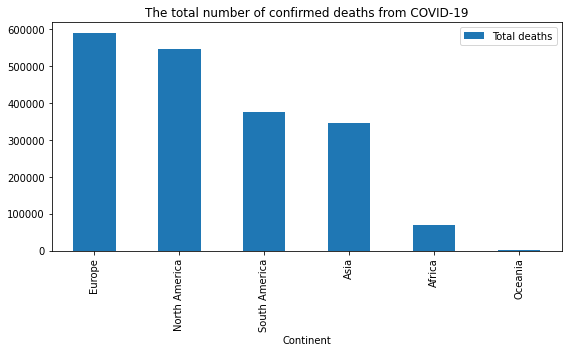

In [33]:
# plot a bar chart to show which continent got the highest number of total deaths
continent_total_deaths_order.plot(kind="bar", figsize=(8,5))

# Set a title for the chart
plt.title("The total number of confirmed deaths from COVID-19")
plt.tight_layout()
plt.savefig('The number of deaths from COVID-19 by continent.png', bbox_inches = "tight", dpi=300)
plt.show()

In [34]:
#create dataframe for location and total deaths
location_total_deaths = organized_df.groupby(['Location']).agg({'Total deaths':'sum'})
location_total_deaths

,Total deaths
Location,
Afghanistan,2277.0
Albania,1241.0
Algeria,2807.0
Antigua and Barbuda,5.0
Argentina,44495.0
...,...
Venezuela,1061.0
Vietnam,35.0
Yemen,611.0


In [35]:
# the number of total deaths in differnet continent sorting by high to low
location_total_deaths_order = location_total_deaths.sort_values(by='Total deaths', ascending=False)
location_total_deaths_order.head(10)

,Total deaths
Location,
United States,374322.0
Brazil,203100.0
India,151160.0
Mexico,133706.0
United Kingdom,81567.0
Italy,78755.0
France,67885.0
Russia,60963.0
Iran,56171.0


In [36]:
# create data fram to only include the location of top 10 total deaths
top_10_deaths = organized_df.loc[(organized_df["Location"] == "United States") | (
    organized_df["Location"] == "Brazil") | (
    organized_df["Location"] == "India") | (
    organized_df["Location"] == "Mexico") | (
    organized_df["Location"] == "United Kingdom	") | (
    organized_df["Location"] == "Italy") | (
    organized_df["Location"] == "France") | (
    organized_df["Location"] == "Russia") | (
    organized_df["Location"] == "Iran") | (
    organized_df["Location"] == "Spain"), :]
top_10_deaths


,Continent,Location,Total deaths,Hospital beds per thousand,GDP per capita
7275,South America,Brazil,1.0,2.20,14103.452
7276,South America,Brazil,2.0,2.20,14103.452
7277,South America,Brazil,3.0,2.20,14103.452
7278,South America,Brazil,5.0,2.20,14103.452
7279,South America,Brazil,4.0,2.20,14103.452
...,...,...,...,...,...
56450,North America,United States,3854.0,2.77,54225.446
56451,North America,United States,4194.0,2.77,54225.446
56452,North America,United States,3939.0,2.77,54225.446
56453,North America,United States,3252.0,2.77,54225.446


In [37]:
# groupby the top 10 total deaths
deaths_group = top_10_deaths.groupby(['Location']).agg({'Total deaths':'sum'})
deaths_group

#sorting the total deaths from high to low
deaths_group_order = deaths_group.sort_values(by='Total deaths', ascending=False)
deaths_group_order


,Total deaths
Location,
United States,374322.0
Brazil,203100.0
India,151160.0
Mexico,133706.0
Italy,78755.0
France,67885.0
Russia,60963.0
Iran,56171.0
Spain,51874.0


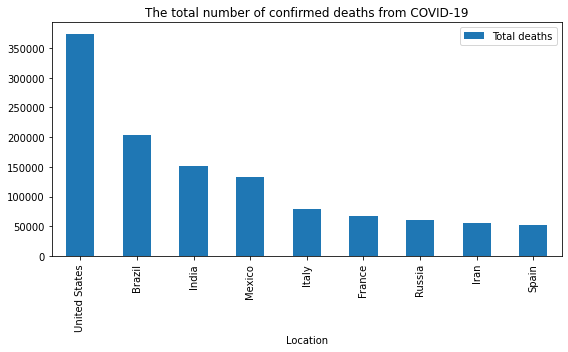

In [38]:
#plot the bar chart for top 10 total death country
deaths_group_order.plot(kind="bar", figsize=(8,5))

# Set a title for the chart
plt.title("The total number of confirmed deaths from COVID-19")

plt.tight_layout()
plt.savefig('The number of deaths from COVID-19 by Location.png', bbox_inches = "tight", dpi=300)
plt.show()


Histogram for hospital beds per thousand

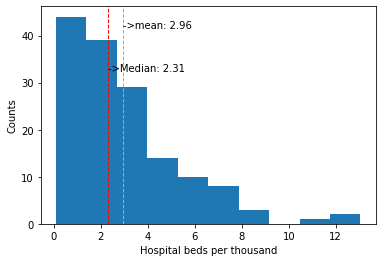

The mean hospital beds per thousand is 2.96254
The median hospital beds per thousand is 2.3100000000000076
The mode hospital beds per thousand is ModeResult(mode=array([0.5]), count=array([3]))
NormaltestResult(statistic=53.66934376261804, pvalue=2.217430813788593e-12)
The population variance using the NumPy module is 5.615600795066668
The population standard deviation using the NumPy module is 2.3697258902807024
Roughly 68% of the data is between 0.593 and 5.332
Roughly 95% of the data is between -1.777 and 7.702
Roughly 99.7% of the data is between -4.147 and 10.072
The z-scores using the SciPy module are [-4.48380973e-01 -1.03916660e+00 -4.90579946e-01 -1.08136558e+00
 -9.12569681e-01 -7.01574814e-01 -3.63983026e-01 -8.28171734e-01
 -3.21784052e-01 -6.59375840e-01 -5.74977893e-01 -3.63983026e-01
 -9.54768655e-01 -3.63983026e-01 -1.12356455e+00  1.40837386e+00
 -7.85972761e-01 -8.70370708e-01 -1.12356455e+00 -6.59375840e-01
 -9.12569681e-01  3.11200550e-01 -1.16576352e+00 -7.01574814

In [39]:
# histogram for hispital beds per thousand in different location
plt.hist(covid_renamed_df['Hospital beds per thousand'])
plt.xlabel('Hospital beds per thousand')
plt.ylabel('Counts')
plt.axvline(covid_renamed_df['Hospital beds per thousand'].mean(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(covid_renamed_df['Hospital beds per thousand'].median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(covid_renamed_df['Hospital beds per thousand'].mean()*1, max_ylim*0.9, '->mean: {:.2f}'.format(covid_renamed_df['Hospital beds per thousand'].mean()))
plt.text(covid_renamed_df['Hospital beds per thousand'].median()*1, max_ylim*0.7, '->Median: {:.2f}'.format(covid_renamed_df['Hospital beds per thousand'].median()))
plt.savefig('Hospital beds per thousand Histogram', bbox_inches = "tight", dpi=300)
plt.show()

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(covid_renamed_df['Hospital beds per thousand'])
print(f"The mean hospital beds per thousand is {mean_numpy}")

median_numpy = np.median(covid_renamed_df['Hospital beds per thousand'])
print(f"The median hospital beds per thousand is {median_numpy}")

mode_scipy = sts.mode(covid_renamed_df['Hospital beds per thousand'])
print(f"The mode hospital beds per thousand is {mode_scipy}")

# charaterized data using stats.normaltest
print(sts.normaltest(covid_renamed_df['Hospital beds per thousand']))

# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(covid_renamed_df['Hospital beds per thousand'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(covid_renamed_df['Hospital beds per thousand'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(covid_renamed_df['Hospital beds per thousand'])
print(f"The z-scores using the SciPy module are {z_scipy}")

Boxplot for hospital bed per thousand

In [40]:
#create dataframe for location and total deaths
hospitalbed_location = organized_df.groupby(['Location']).agg({'Hospital beds per thousand':'mean', 'Total deaths':'sum'})
hospitalbed_location

,Hospital beds per thousand,Total deaths
Location,,
Afghanistan,0.50,2277.0
Albania,2.89,1241.0
Algeria,1.90,2807.0
Antigua and Barbuda,3.80,5.0
Argentina,5.00,44495.0
...,...,...
Venezuela,0.80,1061.0
Vietnam,2.60,35.0
Yemen,0.70,611.0


In [41]:
# check the mean for hospital bed per thousand and total deaths for location
hospitalbed_location.mean()

Hospital beds per thousand        2.962540
Total deaths                  12841.873333
dtype: float64

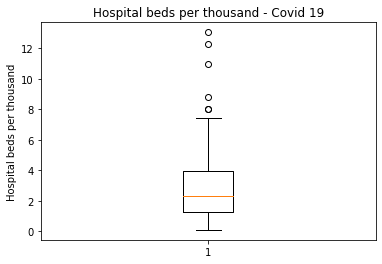

13.05000000000008

In [42]:
# create a boxplot for hospital bed per thousand by location
botxplothospitalbed = hospitalbed_location['Hospital beds per thousand']
fig1, ax1 = plt.subplots()
ax1.set_title('Hospital beds per thousand - Covid 19')
ax1.set_ylabel('Hospital beds per thousand')
ax1.boxplot(botxplothospitalbed)
plt.savefig('Hospital beds per thousand Boxplot', bbox_inches = "tight", dpi=300)
plt.show()
botxplothospitalbed.min()
botxplothospitalbed.max()

In [43]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = botxplothospitalbed.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of hospital bed per thousand is: {lowerq}")
print(f"The upper quartile of hospital bed per thousand is: {upperq}")
print(f"The interquartile range of hospital bed per thousand is: {iqr}")
print(f"The the median of hospital bed per thousand is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_hospitalbed = hospitalbed_location.loc[(hospitalbed_location['Hospital beds per thousand'] < lower_bound) | (hospitalbed_location['Hospital beds per thousand'] > upper_bound)]
outlier_hospitalbed

The lower quartile of hospital bed per thousand is: 1.3000000000000005
The upper quartile of hospital bed per thousand is: 3.9652500000000006
The interquartile range of hospital bed per thousand is: 2.6652500000000003
The the median of hospital bed per thousand is: 2.3100000000000076 
Values below -2.697875 could be outliers.
Values above 7.963125000000002 could be outliers.


,Hospital beds per thousand,Total deaths
Location,,
Belarus,11.00,1517.0
Germany,8.00,40936.0
Japan,13.05,3850.0
Russia,8.05,60963.0
South Korea,12.27,1140.0
Ukraine,8.80,20641.0


In [44]:
# sorting the highest hispital bed in order
outlier_hospitalbed_order = outlier_hospitalbed.sort_values(by='Hospital beds per thousand', ascending=False)
outlier_hospitalbed_order

,Hospital beds per thousand,Total deaths
Location,,
Japan,13.05,3850.0
South Korea,12.27,1140.0
Belarus,11.00,1517.0
Ukraine,8.80,20641.0
Russia,8.05,60963.0
Germany,8.00,40936.0


Scatter plot for hospital bed per thousand

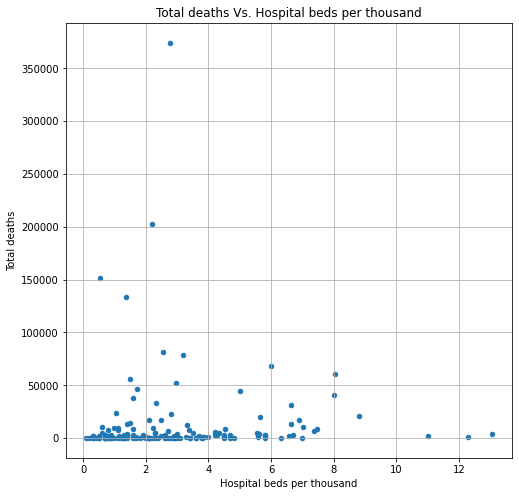

In [45]:
# Create a scatter plot which compares hospital bed per thousand to total deaths
covid_renamed_df.plot(kind="scatter", x="Hospital beds per thousand", y="Total deaths", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.savefig('Total deaths VS Hospital beds per thousand', bbox_inches = "tight", dpi=300)
plt.show()

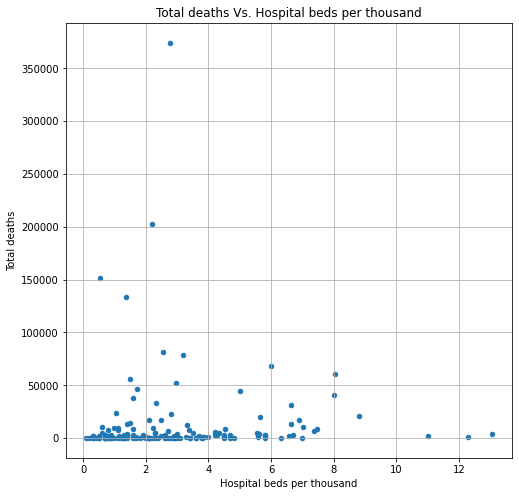

In [46]:
# Create a scatter plot which compares total deaths to hospital beds per thousand 
covid_renamed_df.plot(kind="scatter", x="Hospital beds per thousand", y="Total deaths", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

In [47]:
# Compute the Pearson correlation coefficient between "Total deaths" and "Hospital beds per thousand"
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
Total_deaths = covid_renamed_df["Total deaths"]
correlation = st.pearsonr(Hospital_beds_per_thousand,Total_deaths)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.0102488385


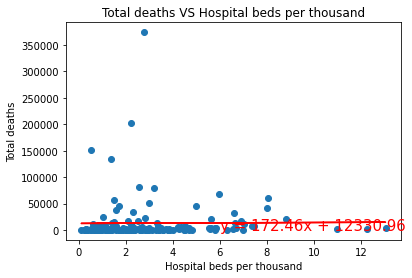

In [48]:
# Add the linear regression equation and line to plot
x_values = covid_renamed_df['Hospital beds per thousand']
y_values = covid_renamed_df['Total deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Total deaths VS Hospital beds per thousand")
plt.xlabel('Hospital beds per thousand')
plt.ylabel('Total deaths')
plt.savefig('Total deaths VS Hospital beds per thousand with regression line', bbox_inches = "tight", dpi=300)
plt.show()

The r-squared is: 0.00010503868991530593


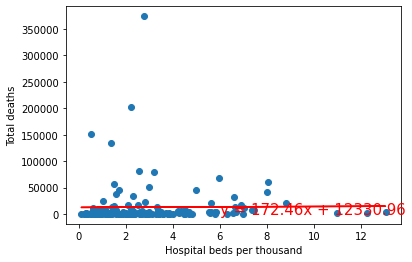

In [49]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['Hospital beds per thousand']
y_values = covid_renamed_df['Total deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Hospital beds per thousand')
plt.ylabel('Total deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Total Deaths vs Median age


In [50]:
#

# Total Deaths and Total GDP

In [51]:
# use .describe to see the summary of column (gdp per capita)
organized_df["GDP per capita"].describe()

count     42974.000000
mean      21498.421953
std       20461.425095
min         661.240000
25%        6253.104000
50%       15663.986000
75%       31400.840000
max      116935.600000
Name: GDP per capita, dtype: float64

In [52]:
# sorting the gdp from high to low
gdp_per_capita_high = covid_renamed_df.sort_values("GDP per capita", ascending=False)
gdp_per_capita_high.head(10)

Total deaths  Hospital beds per thousand  \
Continent Location                                                         
Asia      Qatar                        246.0                        1.20   
Europe    Luxembourg                   527.0                        4.51   
Asia      Singapore                     29.0                        2.40   
          Brunei                         3.0                        2.70   
Europe    Ireland                     2344.0                        2.96   
Asia      United Arab Emirates         708.0                        1.20   
          Kuwait                       943.0                        2.00   
Europe    Norway                       472.0                        3.60   
          Switzerland                 8267.0                        4.53   
          San Marino                    64.0                        3.80   

                                GDP per capita  
Continent Location                              
Asia      Qatar                     116935.600  
Europe    Luxembourg                 94277.965  
Asia      Singapore                  85535.383  
          Brunei                     71809.251  
Europe    Ireland                    67335.293  
Asia      United Arab Emirates       67293.483  
          Kuwait                     65530.537  
Europe    Norway                     64800.057  
          Switzerland                57410.166  
          San Marino                 56861.470

In [53]:
# sorting the gdp from low to high
gdp_per_capita_low = covid_renamed_df.sort_values("GDP per capita")
gdp_per_capita_low.head(10)

Total deaths  Hospital beds per thousand  \
Continent Location                                                             
Africa    Central African Republic          63.0                         1.0   
          Burundi                            2.0                         0.8   
          Liberia                           83.0                         0.8   
          Niger                            126.0                         0.3   
          Malawi                           225.0                         1.3   
          Mozambique                       192.0                         0.7   
          Comoros                           18.0                         2.2   
          Madagascar                       267.0                         0.2   
          Togo                              72.0                         0.7   
Asia      Yemen                            611.0                         0.7   

                                    GDP per capita  
Continent Location                                  
Africa    Central African Republic         661.240  
          Burundi                          702.225  
          Liberia                          752.788  
          Niger                            926.000  
          Malawi                          1095.042  
          Mozambique                      1136.103  
          Comoros                         1413.890  
          Madagascar                      1416.440  
          Togo                            1429.813  
Asia      Yemen                           1479.147

In [54]:
# groupby location and aggregate gdp per capita
aaa = organized_df.groupby(['Location']).agg({'GDP per capita':'mean'})
aaa

,GDP per capita
Location,
Afghanistan,1803.987
Albania,11803.431
Algeria,13913.839
Antigua and Barbuda,21490.943
Argentina,18933.907
...,...
Venezuela,16745.022
Vietnam,6171.884
Yemen,1479.147


Histogram for GDP per capita

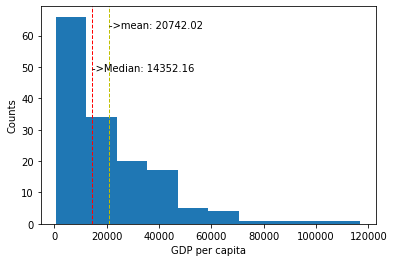

The mean GDP per capita is 20742.02262666668
The median GDP per capita is 14352.156500000023
The mode GDP per capita is ModeResult(mode=array([661.24]), count=array([1]))
NormaltestResult(statistic=61.273783690218295, pvalue=4.9495638263411707e-14)
The population variance using the NumPy module is 412981412.3773399
The population standard deviation using the NumPy module is 20321.944109197328
Roughly 68% of the data is between 420.079 and 41063.967
Roughly 95% of the data is between -19901.866 and 61385.911
Roughly 99.7% of the data is between -40223.81 and 81707.855
The z-scores using the SciPy module are [-0.33600051 -0.91909448 -0.24282365 -0.93686512 -0.98611617 -0.85509027
 -0.71447242 -0.98813295 -0.95109663 -0.88754386 -0.5015178   0.09166694
 -0.94634468 -0.63985254 -0.93554512 -0.20566977 -0.94381992 -0.81263842
 -0.92230825 -0.87339058 -0.98362807 -0.14075984 -0.95097115 -0.96678647
 -0.92155143 -0.022108   -0.65234948 -0.96476595 -0.97510467 -0.87045356
 -0.41566627 -0.80088

In [55]:
# histogram for GDP per capita beds per thousand in different location
plt.hist(covid_renamed_df['GDP per capita'])
plt.xlabel('GDP per capita')
plt.ylabel('Counts')
plt.axvline(covid_renamed_df['GDP per capita'].mean(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(covid_renamed_df['GDP per capita'].median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(covid_renamed_df['GDP per capita'].mean()*1, max_ylim*0.9, '->mean: {:.2f}'.format(covid_renamed_df['GDP per capita'].mean()))
plt.text(covid_renamed_df['GDP per capita'].median()*1, max_ylim*0.7, '->Median: {:.2f}'.format(covid_renamed_df['GDP per capita'].median()))
plt.savefig('GDP per capita Histogram', bbox_inches = "tight", dpi=300)
plt.show()

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(covid_renamed_df['GDP per capita'])
print(f"The mean GDP per capita is {mean_numpy}")

median_numpy = np.median(covid_renamed_df['GDP per capita'])
print(f"The median GDP per capita is {median_numpy}")

mode_scipy = sts.mode(covid_renamed_df['GDP per capita'])
print(f"The mode GDP per capita is {mode_scipy}")

# charaterized data using stats.normaltest
print(sts.normaltest(covid_renamed_df['GDP per capita']))

# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(covid_renamed_df['GDP per capita'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(covid_renamed_df['GDP per capita'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(covid_renamed_df['GDP per capita'])
print(f"The z-scores using the SciPy module are {z_scipy}")

In [56]:
#create dataframe, groupby location and aggregate gdp and total deaths
gdp_location = organized_df.groupby(['Location']).agg({'GDP per capita':'mean', 'Total deaths':'sum'})
gdp_location

,GDP per capita,Total deaths
Location,,
Afghanistan,1803.987,2277.0
Albania,11803.431,1241.0
Algeria,13913.839,2807.0
Antigua and Barbuda,21490.943,5.0
Argentina,18933.907,44495.0
...,...,...
Venezuela,16745.022,1061.0
Vietnam,6171.884,35.0
Yemen,1479.147,611.0


In [57]:
# check the mean for gdp per capita and total deaths by location
gdp_location.mean()

GDP per capita    20742.022627
Total deaths      12841.873333
dtype: float64

Boxplot for GDP per capita

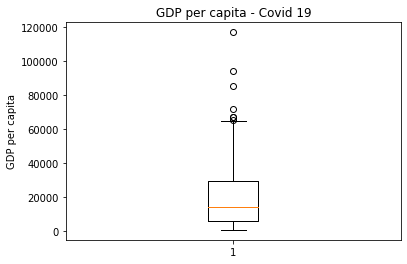

In [58]:
# create a boxplot for gdp per capita by location
botxplotgdp = gdp_location['GDP per capita']
fig1, ax1 = plt.subplots()
ax1.set_title('GDP per capita - Covid 19')
ax1.set_ylabel('GDP per capita')
ax1.boxplot(botxplotgdp)
plt.savefig('GDP per capita boxplot', bbox_inches = "tight", dpi=300)
plt.show()

In [59]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = botxplotgdp.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of GDP per capita is: {lowerq}")
print(f"The upper quartile of GDP per capita is: {upperq}")
print(f"The interquartile range of GDP per capita is: {iqr}")
print(f"The the median of GDP per capita is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_gdp = gdp_location.loc[(gdp_location['GDP per capita'] < lower_bound) | (gdp_location['GDP per capita'] > upper_bound)]
outlier_gdp


The lower quartile of GDP per capita is: 5736.6687500000035
The upper quartile of GDP per capita is: 29513.51174999995
The interquartile range of GDP per capita is: 23776.842999999946
The the median of GDP per capita is: 14352.156500000023 
Values below -29928.595749999913 could be outliers.
Values above 65178.776249999864 could be outliers.


,GDP per capita,Total deaths
Location,,
Brunei,71809.251,3.0
Ireland,67335.293,2344.0
Kuwait,65530.537,943.0
Luxembourg,94277.965,527.0
Qatar,116935.600,246.0
Singapore,85535.383,29.0
United Arab Emirates,67293.483,708.0


In [60]:
outlier_gdp_order = outlier_gdp.sort_values(by='GDP per capita', ascending=False)
outlier_gdp_order

,GDP per capita,Total deaths
Location,,
Qatar,116935.600,246.0
Luxembourg,94277.965,527.0
Singapore,85535.383,29.0
Brunei,71809.251,3.0
Ireland,67335.293,2344.0
United Arab Emirates,67293.483,708.0
Kuwait,65530.537,943.0


Scatter plot for GDP per capita

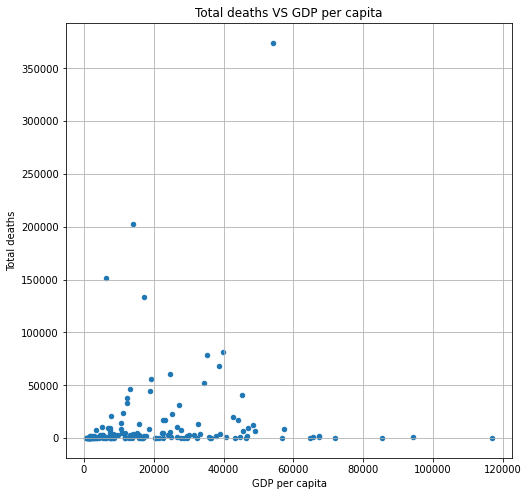

In [61]:
# Create a scatter plot which compares GDP per capita to total deaths
covid_renamed_df.plot(kind="scatter", x="GDP per capita", y="Total deaths", grid=True, figsize=(8,8),
              title="Total deaths VS GDP per capita")
plt.savefig('total deaths vs gdp scatterplot.png', bbox_inches = "tight", dpi=300)
plt.show()

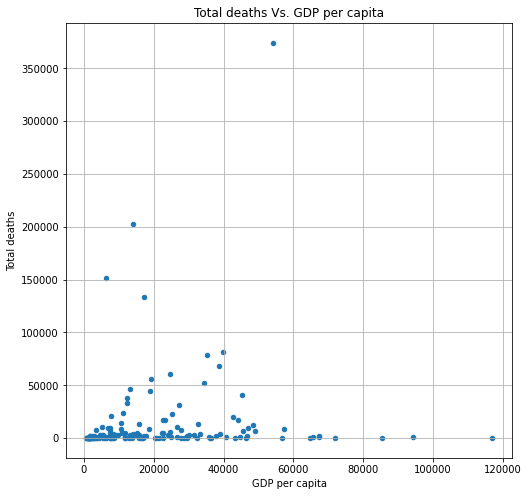

In [62]:
# Create a scatter plot which compares GDP per capita to total deaths
covid_renamed_df.plot(kind="scatter", x="GDP per capita", y="Total deaths", grid=True, figsize=(8,8),
              title="Total deaths Vs. GDP per capita")
plt.show()

In [63]:
# Compute the Pearson correlation coefficient between "Total deaths" and "GDP per capita"
Total_deaths = covid_renamed_df["Total deaths"]
gdp_per_capita = covid_renamed_df["GDP per capita"]
correlation = st.pearsonr(gdp_per_capita,Total_deaths)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.1173729232


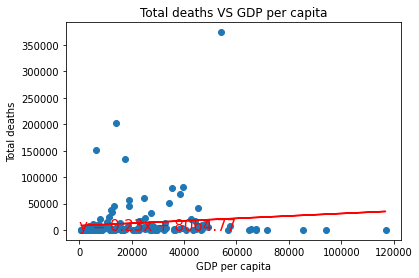

In [64]:
#Add the linear regression equation and line to plot
x_values = covid_renamed_df['GDP per capita']
y_values = covid_renamed_df['Total deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Total deaths VS GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Total deaths')
plt.savefig('Total deaths VS GDP per capita with regression line', bbox_inches = "tight", dpi=300)
plt.show()

The r-squared is: 0.013776403101048421


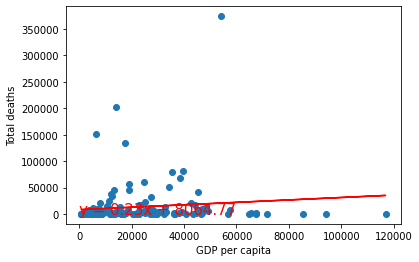

In [65]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['GDP per capita']
y_values = covid_renamed_df['Total deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('GDP per capita')
plt.ylabel('Total deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Total Deaths vs Total Cases

In [66]:
#getting the required columns
organized4_df = covid[["continent", "location", "new_deaths", "new_cases", "total_deaths", "total_cases"]].copy()
organized4_df = organized4_df.dropna(how='any')
organized4_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
27,Asia,Afghanistan,1.0,4.0,1.0,34.0
28,Asia,Afghanistan,0.0,7.0,1.0,41.0
29,Asia,Afghanistan,0.0,2.0,1.0,43.0
30,Asia,Afghanistan,1.0,33.0,2.0,76.0
31,Asia,Afghanistan,1.0,4.0,3.0,80.0
...,...,...,...,...,...,...
59314,Africa,Zimbabwe,13.0,610.0,431.0,17804.0
59315,Africa,Zimbabwe,15.0,871.0,446.0,18675.0
59316,Africa,Zimbabwe,22.0,985.0,468.0,19660.0
59317,Africa,Zimbabwe,15.0,839.0,483.0,20499.0


In [67]:
#checking the data type
organized4_df.dtypes

continent       object
location        object
new_deaths      object
new_cases       object
total_deaths    object
total_cases     object
dtype: object

In [68]:
#change the data type to numerical
organized4_df['new_deaths'] = pd.to_numeric(organized4_df['new_deaths'])
organized4_df['new_cases'] = pd.to_numeric(organized4_df['new_cases'])
organized4_df['total_deaths'] = pd.to_numeric(organized4_df['total_deaths'])
organized4_df['total_cases'] = pd.to_numeric(organized4_df['total_cases'])
#rechecking
organized4_df.dtypes

continent        object
location         object
new_deaths      float64
new_cases       float64
total_deaths    float64
total_cases     float64
dtype: object

In [69]:
# The sum method adds every entry in the series
total_death = organized4_df["new_deaths"].sum()
print(f"Sum of total death = {total_death}")

total_case = organized4_df["new_cases"].sum()
print(f"Sum of total cases = {total_case}")

# getting the mean of both
avg_death = organized4_df["new_deaths"].mean()
avg_cases = organized4_df["new_cases"].mean()
print(f"Mean of total death = {avg_death}")
print(f"Mean of total cases = {avg_cases}")

Sum of total death = 1934532.0
Sum of total cases = 89425767.0
Mean of total death = 38.9382875085544
Mean of total cases = 1799.9631053500261


In [70]:
organized4_df.describe()

,new_deaths,new_cases,total_deaths,total_cases
count,49682.000000,49682.000000,49682.000000,4.968200e+04
mean,38.938288,1799.963105,4872.895234,1.711569e+05
std,164.893166,9428.683972,20398.526835,8.842266e+05
min,-1918.000000,-46076.000000,1.000000,1.000000e+00
25%,0.000000,6.000000,27.000000,1.445000e+03
50%,1.000000,82.000000,151.000000,8.643000e+03
75%,10.000000,621.000000,1314.000000,6.720600e+04
max,4194.000000,302506.000000,374322.000000,2.240675e+07


In [71]:
# checking each country
grouped_inter_data = organized4_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','new_cases':'sum'})

# renaming the columns
covid_renamed4_df = grouped_inter_data.rename(columns={"new_deaths": "Total deaths", "new_cases": "Total Cases"})
covid_renamed4_df

Total deaths  Total Cases
continent     location                               
Africa        Algeria             2807.0     102124.0
              Angola               416.0      18188.0
              Benin                 44.0       3282.0
              Botswana              48.0      16047.0
              Burkina Faso          89.0       8067.0
...                                  ...          ...
South America Paraguay            2405.0     115720.0
              Peru               38049.0    1025946.0
              Suriname             133.0       6998.0
              Uruguay              256.0      25912.0
              Venezuela           1061.0     116503.0

[175 rows x 2 columns]

In [72]:
# the most total death and least has been printed in the beginning

# getting the most total cases
total_cases_high4 = covid_renamed4_df.sort_values("Total Cases", ascending=False)
total_cases_high4.head()

Total deaths  Total Cases
continent     location                                 
North America United States       374322.0   22406730.0
Asia          India               151160.0   10466539.0
South America Brazil              203100.0    8105590.0
Europe        Russia               60963.0    3366568.0
              United Kingdom       81567.0    3081073.0

In [73]:
# getting the least total cases
total_cases_low4 = covid_renamed4_df.sort_values("Total Cases")
total_cases_low4.head()

,,Total deaths,Total Cases
continent,location,,
Oceania,Fiji,2.0,26.0
Asia,Brunei,3.0,58.0
North America,Antigua and Barbuda,5.0,161.0
Asia,Mongolia,2.0,267.0
North America,Saint Lucia,5.0,297.0


The r-squared is: 0.9115186271439102


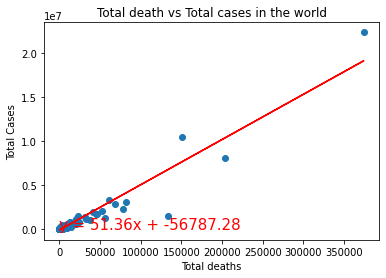

<Figure size 432x288 with 0 Axes>

In [74]:
# making plot
lines = covid_renamed4_df.plot.scatter(x='Total deaths', y='Total Cases')

# Print out the r-squared value along with the plot.
x_values = covid_renamed4_df['Total deaths']
y_values = covid_renamed4_df['Total Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Total Cases')
plt.title('Total death vs Total cases in the world')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('scatter_cases.png')

In [75]:
covid_renamed6_df = covid_renamed4_df.reset_index()

In [76]:
covid_renamed6_df = organized4_df[organized4_df["location"] == "United States"]
covid_renamed6_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
56138,North America,United States,1.0,8.0,1.0,25.0
56139,North America,United States,0.0,7.0,1.0,32.0
56140,North America,United States,5.0,23.0,6.0,55.0
56141,North America,United States,1.0,19.0,7.0,74.0
56142,North America,United States,4.0,33.0,11.0,107.0
...,...,...,...,...,...,...
56450,North America,United States,3854.0,250381.0,361123.0,21354750.0
56451,North America,United States,4194.0,280741.0,365317.0,21635491.0
56452,North America,United States,3939.0,292521.0,369256.0,21928012.0
56453,North America,United States,3252.0,264830.0,372508.0,22192842.0


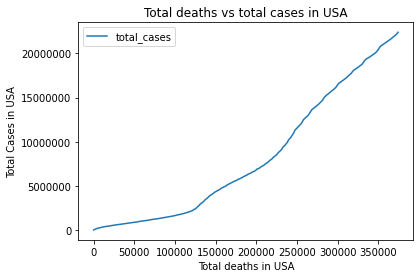

In [77]:
#line graph for the highest total cases
covid_renamed6_df.plot(x='total_deaths', y='total_cases').get_figure()
plt.ticklabel_format(style = 'plain')
plt.xlabel('Total deaths in USA')
plt.ylabel('Total Cases in USA')
plt.title("Total deaths vs total cases in USA")
plt.savefig('lineusa_totaldeathsvscases.png')

In [78]:
covid_renamed5_df = organized4_df[organized4_df["location"] == "Fiji"]
covid_renamed5_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
18332,Oceania,Fiji,1.0,0.0,1.0,27.0
18333,Oceania,Fiji,0.0,0.0,1.0,27.0
18334,Oceania,Fiji,0.0,0.0,1.0,27.0
18335,Oceania,Fiji,0.0,0.0,1.0,27.0
18336,Oceania,Fiji,0.0,0.0,1.0,27.0
...,...,...,...,...,...,...
18491,Oceania,Fiji,0.0,0.0,2.0,53.0
18492,Oceania,Fiji,0.0,0.0,2.0,53.0
18493,Oceania,Fiji,0.0,0.0,2.0,53.0
18494,Oceania,Fiji,0.0,0.0,2.0,53.0


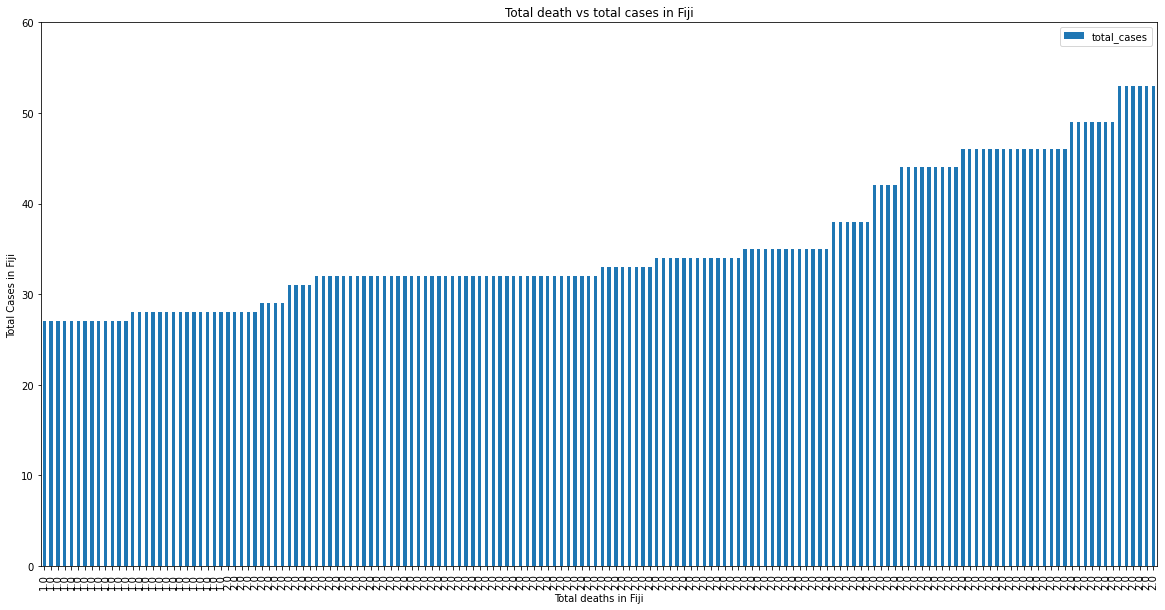

In [79]:
#line graph for the lowest total cases
covid_renamed5_df.plot.bar(x='total_deaths', y='total_cases', xlim=(0,10), ylim=(0,60), figsize=(20,10)).get_figure()
plt.xlabel('Total deaths in Fiji')
plt.ylabel('Total Cases in Fiji')
plt.title('Total death vs total cases in Fiji')
plt.savefig('barfiji_totaldeathsvscases.png')

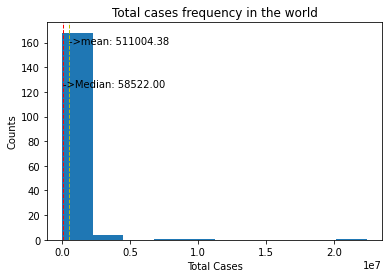

The mean of total cases is 511004.38285714283
The median of total cases is 58522.0
The population variance using the NumPy module is 4000075059340.625
The population standard deviation using the NumPy module is 2000018.7647471274
Roughly 68% of the data is between -1489014.382 and 2511023.148
Roughly 95% of the data is between -3489033.147 and 4511041.912
Roughly 99.7% of the data is between -5489051.911 and 6511060.677


In [80]:
plt.hist(covid_renamed4_df['Total Cases'])
plt.xlabel('Total Cases')
plt.ylabel('Counts')
plt.title('Total cases frequency in the world')
plt.axvline(covid_renamed4_df['Total Cases'].mean(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(covid_renamed4_df['Total Cases'].median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(covid_renamed4_df['Total Cases'].mean()*1, max_ylim*0.9, '->mean: {:.2f}'.format(covid_renamed4_df['Total Cases'].mean()))
plt.text(covid_renamed4_df['Total Cases'].median()*1, max_ylim*0.7, '->Median: {:.2f}'.format(covid_renamed4_df['Total Cases'].median()))
plt.savefig('Total Deaths Hist', bbox_inches = "tight", dpi=300)
plt.show()

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(covid_renamed4_df['Total Cases'])
print(f"The mean of total cases is {mean_numpy}")
median_numpy = np.median(covid_renamed4_df['Total Cases'])
print(f"The median of total cases is {median_numpy}")

# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(covid_renamed4_df['Total Cases'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(covid_renamed4_df['Total Cases'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

In [81]:
boxplotcases = covid_renamed4_df['Total Cases']
boxplotcases

continent      location    
Africa         Algeria          102124.0
               Angola            18188.0
               Benin              3282.0
               Botswana          16047.0
               Burkina Faso       8067.0
                                 ...    
South America  Paraguay         115720.0
               Peru            1025946.0
               Suriname           6998.0
               Uruguay           25912.0
               Venezuela        116503.0
Name: Total Cases, Length: 175, dtype: float64

In [82]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = boxplotcases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of total cases is: {lowerq}")
print(f"The upper quartile of total cases is: {upperq}")
print(f"The interquartile range of total cases is: {iqr}")
print(f"The the median of total cases is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of total cases is: 8534.0
The upper quartile of total cases is: 227539.0
The interquartile range of total cases is: 219005.0
The the median of total cases is: 58522.0 
Values below -319973.5 could be outliers.
Values above 556046.5 could be outliers.


In [83]:
# Export file as a CSV, without the Pandas index, but with the header
#grouped_international_data.to_csv("fileOne.csv", index=False, header=True)